# <div style="direction: rtl;"> פרוייקט סיום רשתות תקשורת </div> 
### <div style="direction: rtl;"> <font color='plum'>  מגישות: </font> </div> 
 <div style="direction: rtl;"> יעלה סיטרון 209914050 </div> 
 <div style="direction: rtl;">אביגיל אייזקס 212457535 </div> 

#### <div style="direction: rtl;"> פתחנו 3 קבוצות בטלגרם + ערוץ 1 : </div>
<img src="img/p2.jpeg" alt="Image" style="width: 300px;">

#### <div style="direction: rtl;">  בנוסף פתחנו קבוצה אחת בוואטסאפ על מנת לקבל השוואה בין הטלגרם לוואטסאפ : </div>
<img src="img/p1.jpeg" alt="Image" style="width: 300px;">

### <div style="direction: rtl;"> <font color='plum'>  בחרנו להתמקד בטלגרם מכמה סיבות -  </font> </div>
<div style="direction: rtl;">  1. פחות רעשי רקע מכיוון ואנו פחות פעילות בטלגרם </div>
<div style="direction: rtl;">  2. האפשרות לחקור "ערוץ" ציבורי (שבו כל אחד יכול להצטרף אך רק מנהלים יכולים לשלוח הודעות) לא קיים בוואטסאפ </div>
<div style="direction: rtl;">  3. המאמר שעליו מבוסס הפרוייקט שלנו בוצע על הטלגרם </div>

### <div style="direction: rtl;"> על מנת לסנן את התעבורה לטלגרם\whatsapp בלבד בדקנו את כתובת ה ip בשימושם: </div>
<img src="img/p3.jpeg" alt="Image" style="width: 600px;">
<img src="img/img2.jpeg" alt="Image" style="width: 600px;">
<img src="img/ip.jpeg" alt="Image" style="width: 400px;">
<img src="img/ip2.jpeg" alt="Image" style="width: 400px;">

## <div style="direction: rtl;"> <font color='plum'>  שאלות המחקר שלנו:  </font> </div>



<div style="direction: rtl;">1. מה הם ההבדלים בין הגדלים של החבילות השונות כאשר אנו שולחים הודעת טקסט רגיל, הודעה קולית, תמונה, סרטון, קובץ,מיקום ואיש קשר? </div>
 <div style="direction: rtl;"> 2. האם קיים הבדל בגודל המנות בין שליחת הודעות מהטלפון לבין שליחת הודעות מהמחשב הנייד? </div>
 
<div style="direction: rtl;"> 3. כאשר מקליטים ממחשב א', האם קיים הבדל בגודל המנות בין ההודעות שנשלחות מטלפון א' (אשר בשימוש המקליט) לבין טלפון ב'?  </div>



 <div style="direction: rtl;">4. האם יש הבדל בין הודעה שהועברה לבין הודעה שנשלחה רגיל ? </div>
   <div style="direction: rtl;">5. האם יש הבדל בין שליחת תמונה לבנה\שחורה\צבעונית? </div>
   <div style="direction: rtl;">6. האם יש הבדל בין הקלטה "שקטה" ל "רועשת"? </div>
   <div style="direction: rtl;"> 7. האם קיים הבדל בגודל המנות בין שליחת הודעות בערוץ לבין קבוצה? </div>
  <div style="direction: rtl;">8. כאשר מקליטים משני מחשבים ורק אחד מהם נמצא בקבוצת יעד והשני לא האם נצליח להבחין מי נמצא בקבוצת היעד על ידי שליחת הודעות אינדוקטיביות? </div>
  <div style="direction: rtl;">9. מה הם ההבדלים בגדלי המנות בין התעבורה שעוברת בוואטספ לבין הטלגרם? </div>
<div style="direction: rtl;">  10. האם נוכל להבחין בתכנים מועברים גם כאשר ישנו "רעש" רקע קבוע?  </div>

  ### <div style="direction: rtl;"> <font color='plum'>  על מנת לענות על שאלות אלו, שלחנו אובייקטים שונים בפולסים של 30 שניות. </font> </div>


## <div style="direction: rtl;"> הסבר על הקוד: </div>



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### <div style="direction: rtl;"> פונקציה הטוענת את קובץ ה csv אותו ייצאנו מה wireshark ומציגה את הגרפים הבאים: </div>

In [29]:
def display(file_name):
    #Step 1 : Load the data from the CSV file
    data = pd.read_csv(file_name)

    # Extract "Time" and "Length" values from the DataFrame as numpy arrays
    time_values = data["Time"].astype(float).to_numpy()
    length_values = data["Length"].astype(int).to_numpy()

    plot_time_per_len(time_values,length_values)
    
    plot_time_per_len_groupby(time_values,length_values)

    plot_pdf(time_values)

    plot_packet_per_1_sec(data,time_values)
    
    

### <div style="direction: rtl;"> גרף המציג את גדלי הפאקטות שהתקבלו בתעבורה על ציר הזמן </div>

In [30]:
def plot_time_per_len(time_values,length_values):
    # Plot the data as bars
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(time_values, length_values)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Packet Size (bytes)")
    plt.title("Packet Size vs. Time")
    plt.grid(axis="y")  # Add grid lines only to the y-axis
    plt.show()

### <div style="direction: rtl;"> גרף המציג את גדלי הפאקטות  שהתקבלו בתעבורה כאשר הוא מאחד פאקטות שנשלחו בזמנים קרובים (0.7 שניות) על ציר הזמן </div>

In [31]:
def plot_time_per_len_groupby(time_values, length_values):
    # Plot the data as bars
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Group packets sent within 0.7 seconds and calculate their total length
    grouped_time = []
    grouped_length = []
    current_time = time_values[0]
    current_length = 0

    for time, length in zip(time_values, length_values):
        if time - current_time <= 0.7:
            current_length += length
        else:
            grouped_time.append(current_time)
            grouped_length.append(current_length)
            current_time = time
            current_length = length

    plt.bar(grouped_time, grouped_length, width=0.7)  # Use width to indicate the time interval
    plt.xlabel("Time (seconds)")
    plt.ylabel("Total Packet Size (bytes)")
    plt.title("Total Packet Size vs. Time (Packets Sent within 0.7 seconds)")
    plt.grid(axis="y")  # Add grid lines only to the y-axis
    plt.show()

### <div style="direction: rtl;">גרף המציג את ה- PDF - probability density function באמצעותו ניתן לזהות אירועים גם באמצעות היחס בין כמות (מספר) המנות בזמני ה-IMDs השונים (ללא שימוש בגודל המנות).</div>

In [80]:
def plot_pdf(time_values):
    # Calculate the time differences between packets
    time_diff = time_values[1:] - time_values[:-1]

    # Calculate the histogram
    hist, bin_edges = np.histogram(time_diff, bins=20, density=True)
    bin_width = bin_edges[1] - bin_edges[0]
    normalized_hist = hist / hist.sum()

    # Plot the Histogram of Inter-Message Delays
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], normalized_hist, width=bin_width, alpha=0.5, edgecolor='blue', fill=False, label="Histogram of Inter-Message Delays")

    plt.xlabel("Time Difference")
    plt.ylabel("Normalized Probability Density")
    plt.title("Histogram of Inter-Message Delays")
    plt.legend()
    plt.show()

### <div style="direction: rtl;"> גרף המציג את מספר הפאקטות שהתקבלו בתעבורה בכל שניה על ציר הזמן </div>

In [33]:
def plot_packet_per_1_sec(data,time_values):
    # Convert time to one-second intervals and sum the number of packets for each interval
    time_intervals = pd.cut(time_values, bins=int(time_values.max() ) + 1, labels=False)
    packets_per_interval = data.groupby(time_intervals)['No.'].count()

    # Create a new DataFrame with the time intervals and normalized packets
    result_data = pd.DataFrame({'Time': (packets_per_interval.index ).astype(float), 'Packets': packets_per_interval})

    # Plotting the data
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    plt.plot(result_data['Time'].values, result_data['Packets'].values, marker='o', linestyle='-')
    plt.xlabel('Time (Seconds)')
    plt.ylabel('packets per interval')
    plt.title('Number of Packets in one-Second Intervals')
    plt.grid(True)
    plt.show()

  # <div style="direction: rtl;"> <font color='plum'> הקדמה - </font> </div>
  <div style="direction: rtl;">במהלך המחקר נתקלנו בהמון "רעשי רקע", לאחר בדיקות גילינו כי רעשים אלו מתרחשים כאשר יש פעילות באפליקציה והם כוללים -  </div>
<div style="direction: rtl;">הודעות [SYN,ACK] אשר מודיעה על חידוש הקשר  </div>
<div style="direction: rtl;">הודעות [FIN,ACK] אשר מודיעה על סיום הקשר  </div>
  <div style="direction: rtl;">הודעות [PSH,ACK] אשר מודיעות על העברת תכנים  </div>
 <div style="direction: rtl;">הודעות  "Change Cipher Spec" אשר מודיעה על המעבר לתקשורת מוצפנת  </div>  

### <div style="direction: rtl;">בעקבות זאת, ביצענו "בדיקת בקרה" על מנת להבין מה הם "רעשי הרקע" שייתכן ויופיעו לנו בהקלטות בהמשך. </div>
#### <div style="direction: rtl;">לכן, במשך 10 דקות הקלטנו את התעבורה של הטלגרם ללא שליחה\קבלת הודעות, להלן התוצאות - </div>

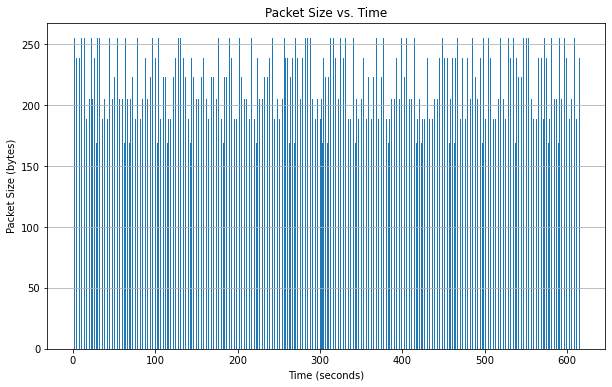

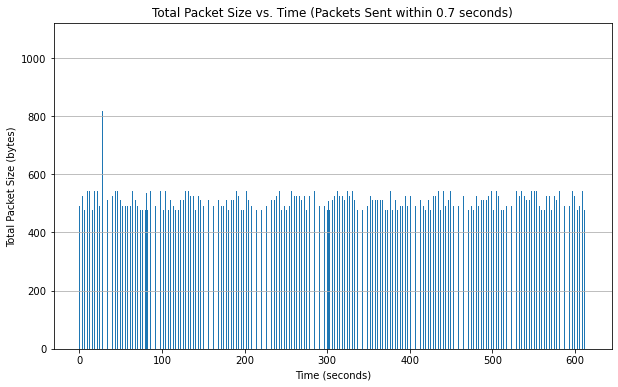

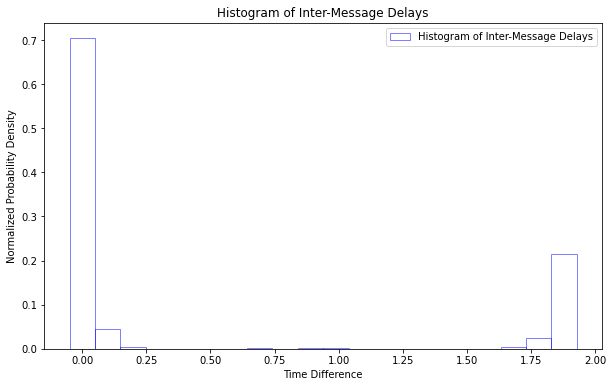

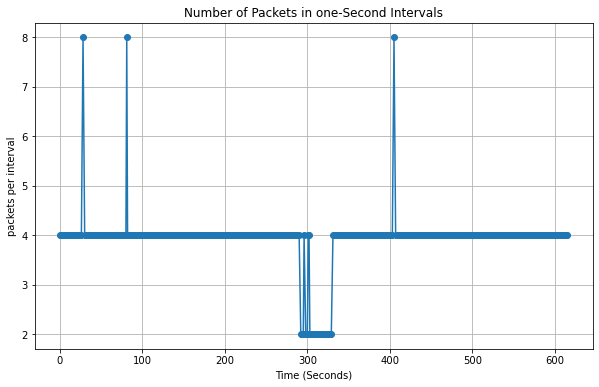

In [65]:
display("control.csv")


## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות - </font> </div>
### <div style="direction: rtl;">כאשר אין פעילות באפליקציה, אין רעשי רקע משמעותיים. </div>
# <div style="direction: rtl;"> <font color='plum'> במהלך המחקר ננסה לענות על השאלות שהוצגו לעיל - </font> </div>

## <div style="direction: rtl;"> <font color='hotpink'>1. מה הם ההבדלים בין הגדלים של החבילות השונות כאשר אנו שולחים הודעת טקסט רגילה, הודעה קולית, תמונה, סרטון, קובץ,מיקום ואיש קשר?  </font> </div>

 <img src="img/abi.png" alt="Image" style="width: 600px;">
 <img src="img/p24.png" alt="Image" style="width: 600px;">
 <img src="img/p25.png" alt="Image" style="width: 600px;">


#### <div style="direction: rtl;">  מבדיקה ב wireshark מצאנו כי בזמן בו שלחנו את הקובץ, נשלחה גם הודעת [SYN,ACK] וכן הודעת חידוש ההצפנה - חבילות אלו הינן "כבדות" ולכן אנו רואים את העלייה בסביבות השנייה ה-150. </div>


## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>

<div style="direction: rtl;">*ניתן לראות כי האובייקטים (תמונה, סרטון וכו') ששלחנו אכן נשלחים בחבילות "כבדות" ולעיתים גם נשלחות במספר חבילות במרווח זמנים קטן</div>
<div style="direction: rtl;">*ניתן לראות כי כאשר שלחנו הודעת טקסט רגילה - ניתן לראות רצף של פאקטות שנשלחות במרווח זמנים קטן, עם זאת ייתכן ומדובר ברעשי רקע כלומר קיים קושי להבחין בשליחת הודעות טקסט רגילות.</div>
 <div style="direction: rtl;">מגרף הPDF ניתן להסיק 2 מסקנות : </div>
 <div style="direction: rtl;">- ניתן לראות כי יש הרבה ערכים שקרובים ל-0, שזה אומר כי יש הרבה חבילות שנשלחו בטווח זמנים קטן מאוד, אשר מעיד על שליחת תכנים "כבדים"(לדוגמא שליחת קובץ מאוד כבד ישלח במספר חבילות עם הפרשי זמנים קטנים) </div>
 <div style="direction: rtl;">- ניתן לראות ערכים קרובים ל-2 כלומר ניתן לסיק כי לפחות אין פעילות במשך 2 שניות מספר פעמים </div>
<div style="direction: rtl;">- גודל הקובץ ששלחנו הוא 397.9KB </div>
<div style="direction: rtl;">- אורך הסרטון הוא 47 שניות </div>
<div style="direction: rtl;">- אורך ההקלטה הוא 53 שניות </div>

### <div style="direction: rtl;"> בנוסף ניתן לראות הלימה לגרף מהמאמר - כמובן שיש הבדלים בגלל רעשי רקע, גדלי הקבצים ואורכי הסירטונים! </div>
 <img src="img/p6.png" alt="Image" style="width: 1000px;">


## <div style="direction: rtl;"> <font color='hotpink'>2. האם קיים הבדל בגודל החבילות כאשר שולחים הודעות מהטלפון לבין אם שולחים הודעות מהמחשב הנייד? </font> </div>

## <div style="direction: rtl;"> להלן תוצאות השוואה בין השניים -  </div>

<img src="img/p20.png" alt="Image" style="width: 1000px;">
<img src="img/p21.png" alt="Image" style="width: 1000px;">
<img src="img/p23.png" alt="Image" style="width: 1000px;">


<div style="direction: rtl;"> נשים לב כי בגרף של ההודעות המטלפון בשניות 30 ו- 210 יש עלייה "לא מוצדקת" - מבדיקה בwireshark עלו התוצאות הבאות:</div>


<img src="img/30.jpeg" alt="Image" style="width: 1000px;">

<div style="direction: rtl;"> ניתן לראות שיש סגירת קשר [FIN,ACK] בframe 85-87</div>
 <div style="direction: rtl;"> בנוסף יש חידוש קשר [SYN,ACK] </div>   
   <div style="direction: rtl;"> בנוסף יש הודעת-  "Change Cipher Spec" אשר מודיעה על המעבר לתקשורת מוצפנת. </div>    <div style="direction: rtl;"> ניתן לראות כי חבילות אלו הן "כבדות" וזה הסיבה לעלייה במספר הפאקטות. </div>   


<img src="img/210.jpeg" alt="Image" style="width: 1000px;">


<div style="direction: rtl;">גם כאן אנו רואים חבילות סיום קשר וחידוש הצפנה וגם כאן הן הסיבה לעלייה בגרף. </div>


## <div style="direction: rtl;"> <font color='hotpink'>3. כאשר מקליטים ממחשב א', האם קיים הבדל בגודל המנות בין ההודעות שנשלחות מטלפון א' (אשר בשימוש המקליט) לבין טלפון ב'? </font> </div>



<img src="img/p30.png" alt="Image" style="width: 1000px;">
<img src="img/pdf3.png" alt="Image" style="width: 1000px;">
<img src="img/p10.png" alt="Image" style="width: 1000px;">


## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>
#### <div style="direction: rtl;"> בהתעלם מהערכים החריגים (רעשים), מדדנו את גדלי הפאקטות (בקירוב) והצגנו אותם בגרף:</div>

<img src="img/p41.png" alt="Image" style="width: 700px;">

###  <div style="direction: rtl;">ניתן לראות כי ההבדלים בין המכשירים הינם קטנים! </div>
###  <div style="direction: rtl;">בנוסף, ניתן לראות כי גדלי הפאקטות שמתקבלות בעת שליחה מהמחשב הנייד גדול יותר מהפקטות המגיעות כאשר המידע נשלח מטלפון צד א' (במקרים אותם בדקנו). </div>

### <div style="direction: rtl;"> ביצענו בדיקה נוספת - שלחנו את אותה התמונה פעם מטלפון א' ופעם מטלפון ב' </div>


<img src="img/p54.png" alt="Image" style="width: 700px;">
<img src="img/p55.png" alt="Image" style="width: 700px;">

## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>
<div style="direction: rtl;">ניתן לראות כי גדלי המנות כאשר צד ב' שולח את התמונות הינו גדול במקצת מהתמונות שצד א' שולח</div>
<div style="direction: rtl;">בנוסף ניתן לראות כי יש עקביות בהפרשי הגדלים, האמנם הם קטנים אך מאוד עקביים (ניתן לראות את העקביות גם בתרשים לעיל "הפרשי הגדלים בין המכשירים השונים")</div>
<div style="direction: rtl;">בנוסף הבחנו כי לאחר כמה שניות משצד א' שולח את התמונה, מתקבלת חבילה גדולה , מבדיקה בwireshark החבילה הגדולה לא יוצאת דופן מהחבילות האחרות.</div>


 
## <div style="direction: rtl;"> <font color='hotpink'>4. האם יש הבדל בין הודעה שהועברה (forward) לבין הודעה שנשלחה רגיל ?  </font> </div>




 <img src="img/g1.png" alt="Image" style="width: 600px;">
 <img src="img/p44.png" alt="Image" style="width: 600px;">



## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>
####  <div style="direction: rtl;">ניתן לראות כי אין הבדל בין שתי אפשרויות השליחה ! </div>

###  <div style="direction: rtl;">בנוסף רצינו לבדוק מה ייקרה אם נעשה העברה לכל הקבצים יחד -  </div>
####  <div style="direction: rtl;">להלן התוצאות - </div>

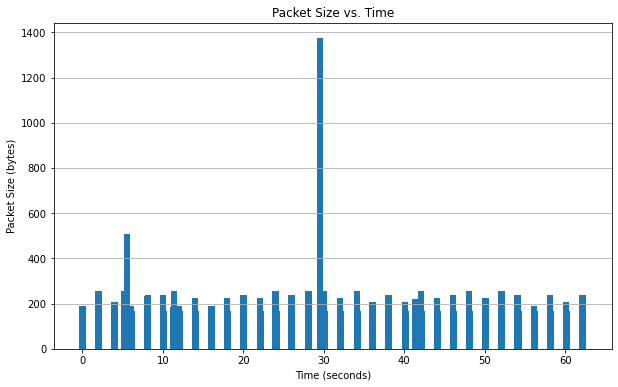

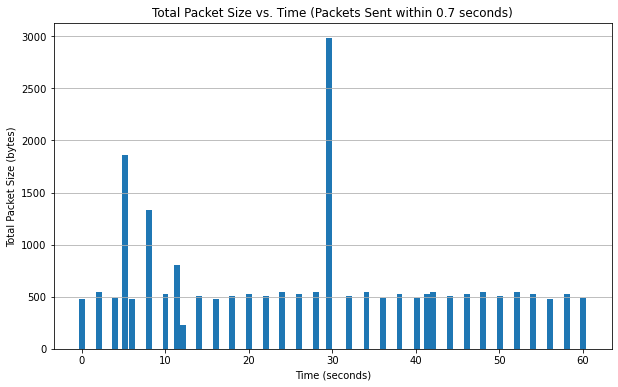

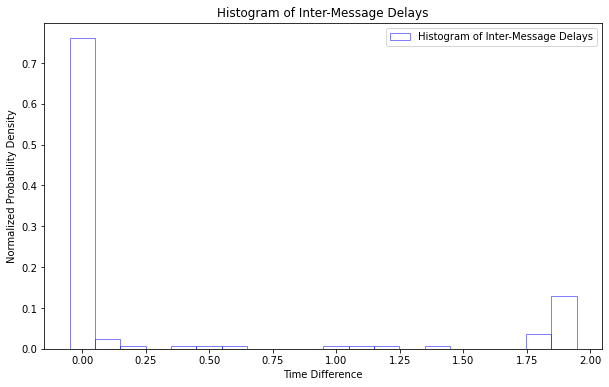

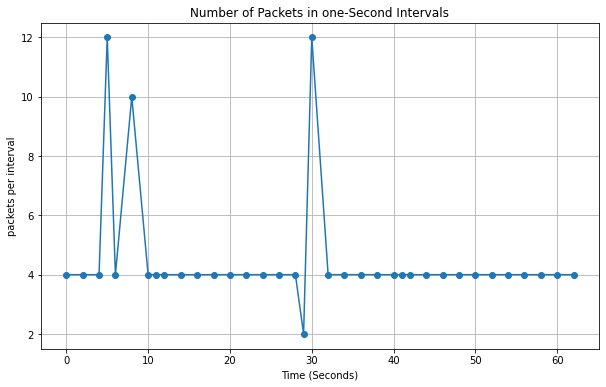

In [96]:
display("forward_all_at_once.csv")

## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>

####  <div style="direction: rtl;">ניתן לראות כי סך גודל ההודעות שהועברו בנפרד גדול בהרבה מסך גודל ההודעה אשר העבירה את כל התכנים יחד. </div>
####  <div style="direction: rtl;"> השערתינו היא כי כאשר אנו שולחים הודעה, יחד איתה מגיע מידע נוסף "מסביב" כגון ההצפנה של ההודעה, היעד של ההודעה ועוד, ולכן כאשר שלחנו את כל התכנים יחד, ה"מסביב" היה צריך להשלח רק פעם אחת.</div>

## <div style="direction: rtl;"> <font color='hotpink'>5. האם יש הבדל בין שליחת תמונה לבנה\שחורה\צבעונית? </font> </div>


#### <div style="direction: rtl;">על מנת לענות על שאלה זו יצרנו 3 תמונות - אחת לבנה, אחת שחורה ואחת צבעונית -  </div>
 <img src="img/p11.png" alt="Image" style="width: 600px;">



### <div style="direction: rtl;"> ניתן לראות גם כי התמונה הצבעונית גדולה בהרבה מהאחרות - מבדיקה בwireshark נמצאו התוצאות הבאות: </div>

<img src="img/p12.jpeg" alt="Image" style="width: 1000px;">

#### <div style="direction: rtl;">  ניתן לראות כי מתבצע חידוש קשר [SYN,ACK] ולאחריה מתבצע חידוש ההצפנה, בנוסף נשלחות הודעות [PSH,ACK], חבילות אלו הן "כבדות" וזה הסיבה לעלייה במספר הפאקטות.</div>


### <div style="direction: rtl;">  לכן ביצענו הקלטה נוספת ללא רעשי רקע משמעותיים - </div>

#### <div style="direction: rtl;"> להלן התוצאות - </div>

 <img src="img/p31.png" alt="Image" style="width: 600px;">


## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>
<div style="direction: rtl;"> ניתן לראות כי התמונה השחורה כבדה יותר מהתמונה הלבנה , בנוסף ניתן לראות כי התמונה הצבעונית כבדה יותר מהתמונות האחרות  </div>

#### <div style="direction: rtl;"> זאת בהלימה לגודל שלהם אשר מצויין בטלפון הנייד: </div>

<img src="img/p15.png" alt="Image" style="width: 1000px;">


 ## <div style="direction: rtl;"> <font color='hotpink'>6. האם יש הבדל בין הקלטה "שקטה" ל "רועשת"? </font> </div>
 
#### <div style="direction: rtl;">על מנת לענות על שאלה זו הקלטנו בנפרד 2 הקלטות באותו האורך -  </div>
<img src="img/p13.jpeg" alt="Image" style="width: 300px;">


####  <div style="direction: rtl;">להלן התוצאות -  </div>
<img src="img/p13.png" alt="Image" style="width: 500px;">
<img src="img/p40.png" alt="Image" style="width: 500px;">

## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>
###  <div style="direction: rtl;">ניתן לראות כי אין הבדל בין שתי סוגי ההקלטות ! </div>


## <div style="direction: rtl;"> <font color='hotpink'>7. האם קיים הבדל בגודל המנות בין שליחת הודעות בערוץ לבין קבוצה? </font> </div>

## <div style="direction: rtl;"> להלן השוואה בין השניים -  </div>

<img src="img/p16.png" alt="Image" style="width: 1000px;">

## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>
#### <div style="direction: rtl;"> בהתעלם מהערכים החריגים (רעשים), מדדנו את גדלי הפאקטות (בקירוב) והצגנו אותם בגרף:</div>
<img src="img/p45.png" alt="Image" style="width: 700px;">


###  <div style="direction: rtl;">ניתן לראות כי ההבדלים בין המכשירים הינם קטנים! </div>
###  <div style="direction: rtl;">בנוסף, ניתן לראות כי הערכים שהגיעו מהערוץ גדולים או שווים לערכים מהקבוצה </div>


  ## <div style="direction: rtl;"> <font color='hotpink'> 8. כאשר מקליטים משני מחשבים ורק אחד מהם נמצא בקבוצת יעד והשני לא האם נצליח להבחין מי נמצא בקבוצת היעד על ידי שליחת הודעות אינדוקטיביות? </font> </div>
 
  ### <div style="direction: rtl;"> על מנת לענות על שאלה זו, ראשית הקלטנו את התעבורה כאשר שתי המכשירים נמצאים בקבוצה  </div>

<img src="img/p46.png" alt="Image" style="width: 1000px;">

  #### <div style="direction: rtl;"> ניתן לראות דמיון רב בין הצורה שבה המידע מתקבל </div>

  ### <div style="direction: rtl;">כעת פתחנו קבוצת טלגרם שרק צד א' נמצא בקבוצה והקלטנו את התעבורה משני המחשבים (מחשב בשימוש צד א' ובשימוש צד ב') </div>
  <img src="img/p50.jpeg" alt="Image" style="width: 300px;">


<img src="img/p47.png" alt="Image" style="width: 1000px;">

## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>
## <div style="direction: rtl;">  ניתן לראות בבירור ובקלות כי הגרף מימין הוא זה שנמצא בקבוצה!  </div>


  ## <div style="direction: rtl;"> <font color='hotpink'> 9. מה הם ההבדלים בגדלי המנות בין התעבורה שעוברת בוואטסאפ לבין הטלגרם? </font> </div>

<img src="img/p52.png" alt="Image" style="width: 1000px;">
<img src="img/p53.png" alt="Image" style="width: 1000px;">



## <div style="direction: rtl;"> הדמיון מתאים לגרפים שהוצגו במאמר - </div>
<img src="img/graph.jpeg" alt="Image" style="width: 1000px;">


### <div style="direction: rtl;"> מבדיקה בwireshark מצאנו כי בסביבות השנייה ה-200 נשלחות הודעות RST (reset) אשר סוגר את הקשר ומבקש לפתוח קשר חדש.  </div>

<img src="img/rst.jpeg" alt="Image" style="width: 1000px;">

## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>
### <div style="direction: rtl;"> גם בוואטספ - כמו בטלגרם, ניתן להבחין בתכנים השונים המועברים בקבוצה  </div>
### <div style="direction: rtl;"> בנוסף, ניתן להבחין בקלות בהודעות טקסט - מה שלא הצלחנו להבחין בבירור בטלגרם זאת מכיוון וכי כאשר אין פעילות באפליקציה יש פחות "רעש" מאשר בטלגרם  </div>





  ## <div style="direction: rtl;"> <font color='hotpink'> 10. האם נוכל להבחין בתכנים מועברים גם כאשר ישנו "רעש" רקע קבוע? </font> </div>

### <div style="direction: rtl;"> עד כה ההקלטות בוצעו ללא חלונות פתוחים באינטרנט מלבד אפליקציית ה-IM , כעת נרצה לראות מה קורה כאשר ישנו "רעש" קבוע ברקע כגון יוטיוב מתנגן :  </div>

#### <div style="direction: rtl;"> להלן התוצאות -  </div>

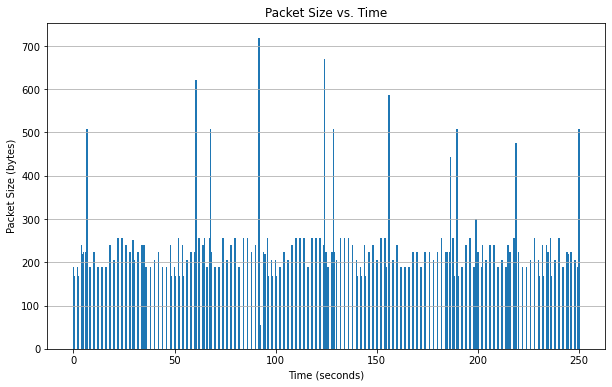

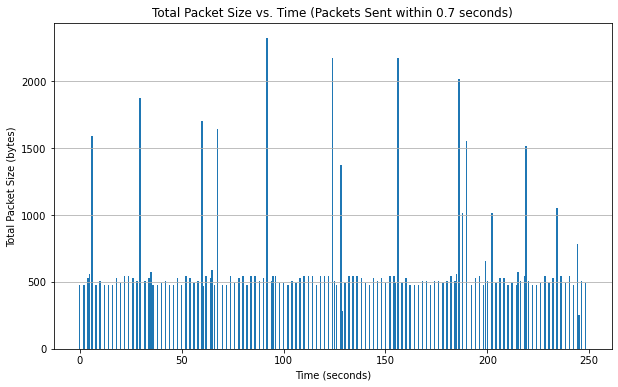

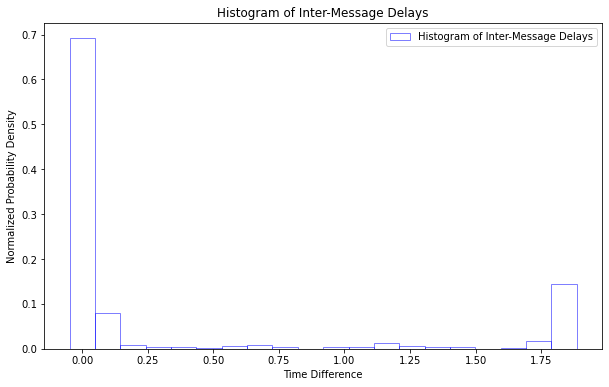

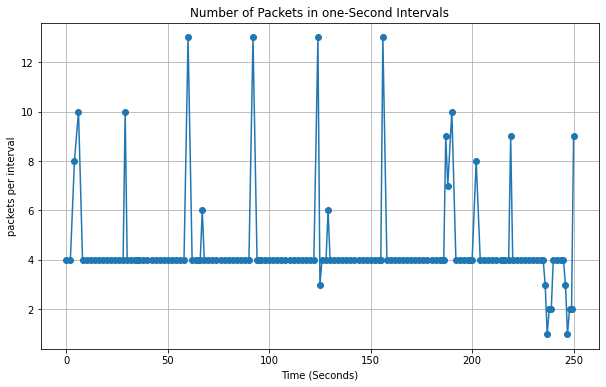

In [94]:
display("object_30sec_with_youtube.csv")

## <div style="direction: rtl;"> <font color='plum'> ניתוח התוצאות -  </font> </div>
#### <div style="direction: rtl;"> ניתן לראות כי בזכות הסינון על ה-IP של טלגרם , לא נראה "רעש" שמגיע מהיוטיוב, בנונסף מבדיקה בwireshark לא נראו חבילות המקושרות ליוטיוב  </div>
#### <div style="direction: rtl;"> לאחר הסרת הסינון עלו המון פאקטות של יוטיוב -  </div>

<img src="img/youtub.jpeg" alt="Image" style="width: 1000px;">

  # <div style="direction: rtl;"> <font color='hotpink'> סיכום - </font> </div>


## <div style="direction: rtl;"> <font color='plum'> מסקנות משאלות המחקר - </font> </div>
<div style="direction: rtl;">* ראינו כי ניתן להבחין בקלות בהעברת אובייקטים (סירטון, קובץ, קטע שמע וכו') באפליקציות IM, בנוסף ראינו כי בעקבות זאת ניתן להבחין האם פעיל נמצא בקבוצת יעד כלשהי רק על ידי הסתכלות בתעבורה שלו על אף שהאפליקציה מוצפנת (כמובן תחת הנחות "ground truth")   </div>
<div style="direction: rtl;">* ראינו כי אין הבדלים משמעותיים בין שליחת\הקלטת התכנים על ידי מכשירים שונים, כמו כן לא ראינו הבדלים משמעותיים בין אם המידע נשלח בערוץ או בקבוצה. </div>
<div style="direction: rtl;">* בנוסף ראינו כי אין הבדלים משמעותיים בין אם שלחנו מידע בוואטספ לבין הטלגרם </div>

## <div style="direction: rtl;"> <font color='plum'> מסקנות על "רעשים" - </font> </div>
<div style="direction: rtl;">*  ראינו כי כאשר אין פעילות באפליקצייה ישנם "רעשי רקע" עדינים שלא מפריעים לנו להבחין בהעברת תכנים "כבדים" יותר,  בנוסף ראינו כי "רעשי רקע" בוואטסאפ הינם עדינים יותר. </div>
<div style="direction: rtl;">*  ראינו כי כאשר יש פעילות באפליקצייה בנוסף לתכנים המועברים מתרחשים גם תהליכים נוספים ברקע ואלו מהווים "רעשי רקע" משמעותיים יותר כגון :</div>
<div style="direction: rtl;"> - מעבר לתקשורת מוצפנת (הודעות  "Change Cipher Spec") </div>
<div style="direction: rtl;"> -  חידוש קשר (הודעות [SYN,ACK]) </div>
<div style="direction: rtl;"> - העברת תכנים (הודעות [PSH,ACK]) </div>
<div style="direction: rtl;"> - סיום קשר (הודעות [FIN,ACK]) </div>


## <div style="direction: rtl;"> <font color='plum'> השוואה לנתונים במאמר - </font> </div>

 ### <div style="direction: rtl;"> <font color='hotpink'> בהתאמה למאמר - </font> </div>
<div style="direction: rtl;"> הגרפים שקיבלנו אכן דומים לגרפים שהוצגו במאמר. </div>
 <img src="img/p6.png" alt="Image" style="width: 700px;">
 <img src="img/graph.jpeg" alt="Image" style="width: 700px;">
 
  ### <div style="direction: rtl;"> <font color='hotpink'> בשונה מהמאמר - </font> </div>
<div style="direction: rtl;"> במאמר הוצגה הטבלה הבאה המייצגת את גודל החבילות שנשלחות עבור כל אובייקט: </div>
<img src="img/table.jpeg" alt="Image" style="width: 600px;">
<div style="direction: rtl;"> במחקר שלנו הגדלים של החבילות השונות היו קטנים בהרבה מהגדלים המופיעים בטבלה (גם כאשר איחדנו חבילות שנשלחו בטווח זמנים קטן) </div>

<div style="direction: rtl;"> הנה כמה דוגמאות: </div>
 <img src="img/last.png" alt="Image" style="width: 800px;">



<div style="direction: rtl;">כפי שניתן לראות חלק מהאובייקטים שלנו כן נמצאים בטווח הנתון בטבלה אך נמצאים בסף התחתון , כאשר שאר האובייקטים הם מתחת לטווח הנתון </div>
<div style="direction: rtl;">לא הצלחנו למצוא הסבר הגיוני לתופעה. </div>
